In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_colwidth', -1)

In [49]:
df = pd.read_csv('../data/processed/data_processed.csv', encoding = 'utf-8', )
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['CustomerID'] = np.nan_to_num(df['CustomerID']).astype(int)

In [50]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,is_free
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,False


In [51]:
# Analysis invoices
df['total_price'] = df['Quantity'] * df['UnitPrice']

In [52]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'is_free', 'total_price'],
      dtype='object')

In [88]:
invoices = df. groupby(['InvoiceNo', 'InvoiceDate', 'CustomerID', 'Country'], as_index=False).sum()
invoices.drop(['UnitPrice', 'is_free'], axis=1, inplace=True)


In [89]:
invoices.head()

,InvoiceNo,InvoiceDate,CustomerID,Country,Quantity,total_price
0,536365,2010-12-01 08:26:00,17850,United Kingdom,40,139.12
1,536366,2010-12-01 08:28:00,17850,United Kingdom,12,22.20
2,536367,2010-12-01 08:34:00,13047,United Kingdom,83,278.73
3,536368,2010-12-01 08:34:00,13047,United Kingdom,15,70.05
4,536369,2010-12-01 08:35:00,13047,United Kingdom,3,17.85


In [65]:
#invoices by date
invoices_date = invoices['InvoiceNo'].groupby(invoices['InvoiceDate'].dt.date).count()

Text(0, 0.5, 'Number of sales')

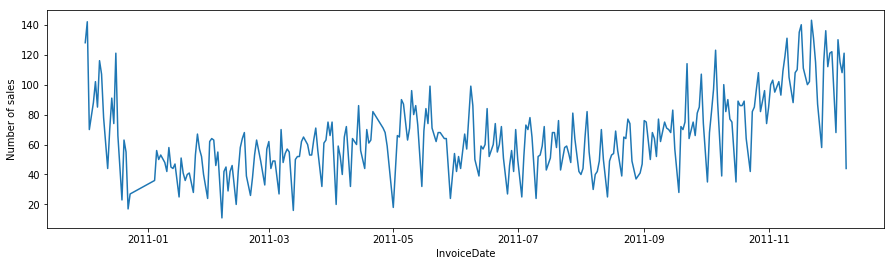

In [67]:
invoices_date.plot(figsize=(15,4))
plt.ylabel('Number of sales')

There are more sales near to the holiday season and the sales are not constant trought the week. No transactions on Sunday?


In [86]:
invoices['weekday'] = invoices['InvoiceDate'].dt.day_name()

In [87]:
invoices.groupby(['weekday']).count()

,InvoiceNo,InvoiceDate,CustomerID,Country,Quantity,total_price
weekday,,,,,,
Friday,3184,3184,3184,3184,3184,3184
Monday,3156,3156,3156,3156,3156,3156
Sunday,2215,2215,2215,2215,2215,2215
Thursday,4282,4282,4282,4282,4282,4282
Tuesday,3601,3601,3601,3601,3601,3601
Wednesday,3737,3737,3737,3737,3737,3737
